# <div style="text-align: center; background-color: #0C6A86; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">🌍EDA on Most visited countries in the world</div>

<h3 style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook Objectives🔎</h3>


<h4>Goal of the notebook is to:</h4> 

1. 📊Explore <b><mark>every feature</mark></b> in the dataset; <br>

2. 🎏<b><mark>Country Analysis</mark></b>(with <b>Rank, Continent</b>);<br>

3. 📝<b><mark>Years Analysis</mark></b> (with <b>2022 Population, 2020 Population etc.</b>);

4. 📈<b><mark>Population Analysis</mark></b> (with <b>Growth Rate, World Population</b>)


<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">Preprocessing Part</h3>


* [Import Packages and Define Useful Functions](#1)
* [Cleaning Data](#2)
<p><b>Analysis Part</b></p>


* [plotting and visualization](#3)
* [WordCloud on Area Locality](#4)


<a id="1"></a>
# <div style="text-align: lefta; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>


In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import missingno as msngo
from wordcloud import WordCloud

<a id="2"></a>
<h3 style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">🗑Cleaning Data</h3>


In [3]:
df=pd.read_csv('../input/most-visited-countries-in-the-world/csvData (1).csv')
df.head()

,country,touristArrivals
0,France,89400000
1,Spain,83700000
2,United States,79300000
3,China,65700000
4,Italy,64500000


<AxesSubplot:>

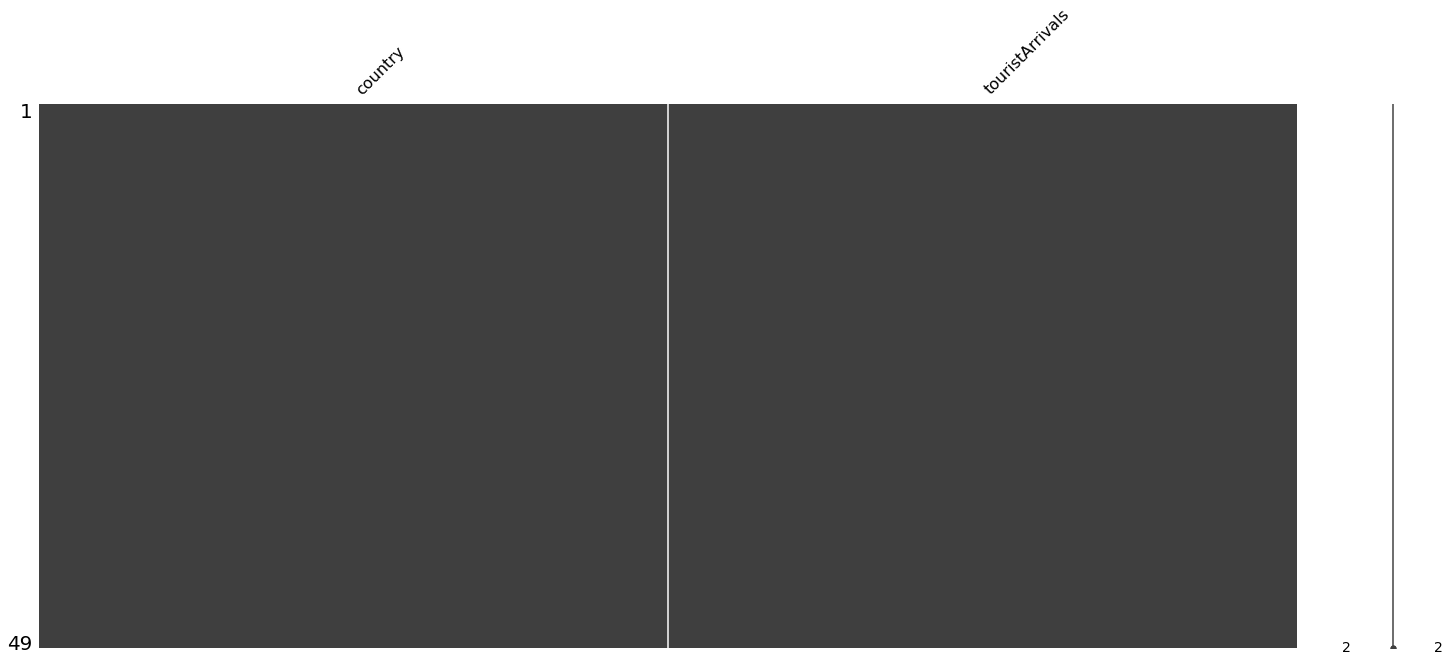

In [9]:
msngo.matrix(df)

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
touristArrivals,49.0,2.456735e+07,2.090704e+07,6600000.0,10900000.0,16900000.0,31300000.0,89400000.0


<a id="3"></a>
<h3 style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 📊plotting and visualization</h3>


In [11]:
fig = px.sunburst(df, path=['country'], values='touristArrivals',color_continuous_scale='jet',
                template='plotly_dark', color='touristArrivals',title='# of tourist')
fig.show()


In [12]:
fig=px.choropleth(df,locations='country',color='touristArrivals',locationmode='country names',template='plotly_dark',title='# of tourist')
fig.show()

In [14]:
fig = px.treemap(df, path=[px.Constant("world"), 'country'], values='touristArrivals',
                color='touristArrivals',template='plotly_dark',title='# of tourist',
                color_continuous_scale='RdBu')
fig.show()

In [16]:
i=[False,True]
for x in i:
    title="Top 10 Smallest touristArrivals " if (x) else "Top 10 Biggest touristArrivals"
    num_of_tourist=df.groupby(by='country')['touristArrivals'].sum().sort_values(ascending=x).head(10)
    fig=px.bar(x=num_of_tourist.index,
            y=num_of_tourist.values,
            color=num_of_tourist.index,
            color_discrete_sequence=px.colors.qualitative.Safe,
            text=num_of_tourist.values,
            title=title,
            template= 'plotly_dark')
    fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="# of tourist ",)
    fig.show()

<a id="4"></a>
<h3 style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">🌍WordCloud on Area Locality</h3>


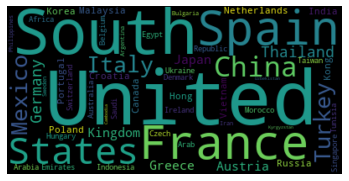

In [17]:
text = " ".join(subject_titles for subject_titles in df["country"])

wordcloud = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()